In [5]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Модальность: CT
Размер изображения: 512 x 512
Количество кадров: 1


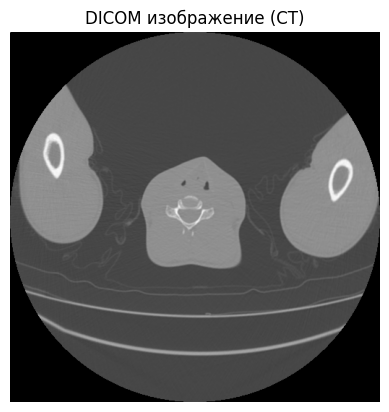

In [2]:
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt


path = ("norma_anon/10000E6B_anon")
ds = pydicom.dcmread(path)

print(f"Модальность: {ds.Modality}")
print(f"Размер изображения: {ds.Rows} x {ds.Columns}")
print(f"Количество кадров: {getattr(ds, 'NumberOfFrames', 1)}")

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.title(f"DICOM изображение ({ds.Modality})")
plt.axis('off')
plt.show()

In [3]:
# посмотрим с содержимое папок norma_anon и pneumonia_anon pneumothorax_anon
for folder in ["norma_anon", "pneumonia_anon", "pneumotorax_anon"]:
    print(f"\nКоличество файлов в папке {folder}:")
    df = [k for k in os.listdir(folder) if 'zone' not in k.lower()]
    print(len(df))
    print(f"Примеры файлов: {df[:5]}")


Количество файлов в папке norma_anon:
451
Примеры файлов: ['10000FA3_anon', '10000F80_anon', '10000EEF_anon', '10000FF1_anon', '10000E99_anon']

Количество файлов в папке pneumonia_anon:
367
Примеры файлов: ['1000042A_anon', '1000045E_anon', '1000037C_anon', '10000470_anon', '100003DA_anon']

Количество файлов в папке pneumotorax_anon:
1
Примеры файлов: ['10000CF6_anon']


In [4]:
# norma_anon аксиальные срезы 451 слоев
# pneumonia_anon  аксиальные срезы 367 слоев
# pneumotorax_anon 1 многослойный файл 

In [5]:
# Сохранение изображения в PNG формате из DICOM файла
def save_dicom_as_png(dicom_path, output_path):
    
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    file_name = os.path.basename(dicom_path)
    
    ds = pydicom.dcmread(dicom_path)
    image = ds.pixel_array

    # Нормализация изображения для корректного отображения
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    image = image.astype(np.uint8)

    img = Image.fromarray(image)
    try:
        img.save(f'{output_path}/{file_name}.png')
    except Exception as e:
        print(f"Ошибка при сохранении {file_name}: {e}")

In [6]:
# функция сохраенения всех слоев из многослойного изображения
def save_all_frames(dicom_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    ds = pydicom.dcmread(dicom_path)
    num_frames = getattr(ds, 'NumberOfFrames', 1)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i in range(num_frames):
        frame = ds.pixel_array[i]
        frame = (frame - np.min(frame)) / (np.max(frame) - np.min(frame)) * 255
        frame = frame.astype(np.uint8)
        img = Image.fromarray(frame)
        img.save(os.path.join(output_folder, f"frame_{i+1:03d}.png"))
        print(f"Сохранен кадр {i+1} как frame_{i+1:03d}.png")

In [7]:
norma_img_pth_df = [f"norma_anon/{k}" for k in os.listdir("norma_anon") if 'zone' not in k.lower()]
pneumonia_img_pth_df = [f"pneumonia_anon/{k}" for k in os.listdir("pneumonia_anon") if 'zone' not in k.lower()]
pneumotorax_img_pth_df = [f"pneumotorax_anon/{k}" for k in os.listdir("pneumotorax_anon") if 'zone' not in k.lower()]

In [8]:
# Сохранение изображения в PNG формате
for dicom_path in norma_img_pth_df:
    f_name = dicom_path.split('/')[-1] + '.png'

    save_dicom_as_png(dicom_path, 'norma_png')
print("Норма сохранена")

Норма сохранена


In [9]:
for dicom_path in pneumonia_img_pth_df:
    f_name = dicom_path.split('/')[-1] + '.png'

    save_dicom_as_png(dicom_path, 'pneumonia_png')
print("Пневмония сохранена")

Пневмония сохранена


In [10]:
# сохраним все слои из многослойного файла
for dicom_path in pneumotorax_img_pth_df:
    save_all_frames(dicom_path, 'pneumotorax_png')

Сохранен кадр 1 как frame_001.png
Сохранен кадр 2 как frame_002.png
Сохранен кадр 3 как frame_003.png
Сохранен кадр 4 как frame_004.png
Сохранен кадр 5 как frame_005.png
Сохранен кадр 6 как frame_006.png
Сохранен кадр 7 как frame_007.png
Сохранен кадр 8 как frame_008.png
Сохранен кадр 9 как frame_009.png
Сохранен кадр 10 как frame_010.png
Сохранен кадр 11 как frame_011.png
Сохранен кадр 12 как frame_012.png
Сохранен кадр 13 как frame_013.png
Сохранен кадр 14 как frame_014.png
Сохранен кадр 15 как frame_015.png
Сохранен кадр 16 как frame_016.png
Сохранен кадр 17 как frame_017.png
Сохранен кадр 18 как frame_018.png
Сохранен кадр 19 как frame_019.png
Сохранен кадр 20 как frame_020.png
Сохранен кадр 21 как frame_021.png
Сохранен кадр 22 как frame_022.png
Сохранен кадр 23 как frame_023.png
Сохранен кадр 24 как frame_024.png
Сохранен кадр 25 как frame_025.png
Сохранен кадр 26 как frame_026.png
Сохранен кадр 27 как frame_027.png
Сохранен кадр 28 как frame_028.png
Сохранен кадр 29 как frame_02